# Análise do covid no Brasil

## Introdução

Esta é uma análise exploratória inicial dos dados do COVID-19 no Brasil.


### Objetivo

O principal objetivo é entender a distribuição da população contaminada por COVID-19.


### Metodologia

Análisar as features a fim de entendermos as distribuições e suas caracteristicas.
Algumas hipóteses:
- A idade tem impacto n

### Resultado Esperado

Espera-se verificar se fatores como idade, sexo e fatores de risco contribuem para complicação da doença.


## Base de Dados

Foi utilizado dados abertos disponíveis em [https://opendatasus.saude.gov.br/dataset/bd-srag-2020](https://opendatasus.saude.gov.br/dataset/bd-srag-2020) com a data de 18/05/2020.

Esta base é disponibilizada pelo ***Vigilância de Síndrome Respiratória Aguda Grave (SRAG)***. O SRAG é um programa da Secretaria de Vigilância em Saúde (SVS).

O Dicionário com o significado de cada uma das colunas esta localizado [Aqui](https://opendatasus.saude.gov.br/dataset/9bc2013f-f293-4f3e-94e7-fa76204fc035/resource/20e51b77-b129-4fd5-84f6-e9428ab5e286/download/dicionario_de_dados_srag_hospitalizado_atual-sivepgripe.pdf)

**Um ponto importante** é que os casos que constam nesta base são os casos mais severos e que necessitaram de atendimento médico. Conforme a recomendação do Ministério da Saúde para a população, os casos com sintomas não tão severos recomendava-se a não ir no pronto atendimento. Ou seja, é importante ter em mente que esses dados não representam a real situação da doença no Brasil, e sim uma amostra.

## Análise da Base e das Características

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.options.display.max_columns = 20
sns.set(style="whitegrid")

In [3]:
# Nao esquecer de descompactar a base de dados

file_name = 'data/INFLUD-16-06-2020-Revisado.csv'

# df_full = pd.read_csv('data/INFLUD-08-06-2020.csv', sep=';', engine='python-fwf', encoding='utf8')
df_full = pd.read_csv(file_name, sep=';', engine='c', encoding='utf8', error_bad_lines=False, low_memory=False)


In [21]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 291130 entries, 0 to 291129
Columns: 134 entries, DT_NOTIFIC to PAC_DSCBO
dtypes: float64(76), int64(10), object(48)
memory usage: 297.6+ MB


### Removendo um pouco das colunas
A base possui muitas colunas (+130), e ao analisar o Dicionário de dados, notei que muitas delas não serão úteis para análise da população do COVID. Vamos ler o documento de Discionário e fazer uma filtragem em alto nível de quais colunas serão retiradas.

In [5]:
# cols_to_drop = ['CS_ETINIA', 'ID_PAIS', 'ID_RG_RESI', 'CO_RG_RESI', 'AVE_SUINO', 'NOSOCOMIAL', 'VACINA', 'DT_UT_DOSE', 'MAE_VAC', 'DT_VAC_MAE', 'M_AMAMENTA', 'DT_DOSEUNI', 'DT_1_DOSE', 'DT_2_DOSE', 'ANTIVIRAL', 'TP_ANTIVIR', 'OUT_ANTIV', 'DT_ANTIVIR', 'RAIOX_RES', 'RAIOX_OUT', 'DT_RAIOX', 'AMOSTRA', 'DT_COLETA', 'TP_AMOSTRA', 'OUT_AMOST', 'REQUI_GAL', 'DT_IF', 'POS_IF_FLU', 'TP_FLU_IF', 'POS_IF_OUT', 'IF_VSR', 'IF_PARA1', 'IF_PARA2', 'IF_PARA3', 'IF_ADENO', 'IF_OUTRO', 'DS_IF_OUT', 'LAB_IF', 'CO_LAB_IF', 'PCR_RESUL', 'DT_PCR', 'TP_FLU_PCR', 'PCR_FLUASU', 'FLUASU_OUT', 'PCR_FLUBLI', 'FLUBLI_OUT', 'POS_PCROUT', 'PCR_VSR', 'PCR_PARA1', 'PCR_PARA2', 'PCR_PARA3', 'PCR_PARA4', 'PCR_ADENO', 'PCR_METAP', 'PCR_BOCA', 'PCR_RINO', 'PCR_OUTRO', 'DS_PCR_OUT', 'CLASSI_OUT', 'HISTO_VGM', 'PAIS_VGM', 'CO_PS_VGM', 'LO_PS_VGM', 'DT_VGM', 'DT_RT_VGM', 'PCR_SARS2', 'PAC_COCBO', 'PAC_DSCBO', 'CO_UN_INTE', 'NM_UN_INTE', 'OBSERVA',]
cols_to_drop = ['CS_ETINIA', 'ID_PAIS', 'ID_RG_RESI', 'CO_RG_RESI', 'AVE_SUINO', 'NOSOCOMIAL', 'VACINA', 'DT_UT_DOSE', 'MAE_VAC', 'DT_VAC_MAE', 'M_AMAMENTA', 'DT_DOSEUNI', 'DT_1_DOSE', 'DT_2_DOSE', 'ANTIVIRAL', 'TP_ANTIVIR', 'OUT_ANTIV', 'DT_ANTIVIR', 'RAIOX_RES', 'RAIOX_OUT', 'DT_RAIOX', 'AMOSTRA', 'DT_COLETA', 'TP_AMOSTRA', 'OUT_AMOST', 'DT_IF', 'POS_IF_FLU', 'TP_FLU_IF', 'POS_IF_OUT', 'IF_VSR', 'IF_PARA1', 'IF_PARA2', 'IF_PARA3', 'IF_ADENO', 'IF_OUTRO', 'DS_IF_OUT', 'PCR_RESUL', 'DT_PCR', 'TP_FLU_PCR', 'PCR_FLUASU', 'FLUASU_OUT', 'PCR_FLUBLI', 'FLUBLI_OUT', 'POS_PCROUT', 'PCR_VSR', 'PCR_PARA1', 'PCR_PARA2', 'PCR_PARA3', 'PCR_PARA4', 'PCR_ADENO', 'PCR_METAP', 'PCR_BOCA', 'PCR_RINO', 'PCR_OUTRO', 'DS_PCR_OUT', 'CLASSI_OUT', 'HISTO_VGM', 'PAIS_VGM', 'CO_PS_VGM', 'LO_PS_VGM', 'DT_VGM', 'DT_RT_VGM', 'PCR_SARS2', 'PAC_COCBO', 'PAC_DSCBO',]
df_clean = df_full.drop(cols_to_drop, axis=1)

In [6]:
df_clean.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 291130 entries, 0 to 291129
Columns: 69 entries, DT_NOTIFIC to DT_DIGITA
dtypes: float64(39), int64(9), object(21)
memory usage: 153.3+ MB


In [7]:
df_clean.sample(4)

,DT_NOTIFIC,SEM_NOT,DT_SIN_PRI,SEM_PRI,SG_UF_NOT,ID_REGIONA,CO_REGIONA,ID_MUNICIP,CO_MUN_NOT,ID_UNIDADE,...,DT_SAIDUTI,SUPORT_VEN,IF_RESUL,POS_PCRFLU,CLASSI_FIN,CRITERIO,EVOLUCAO,DT_EVOLUCA,DT_ENCERRA,DT_DIGITA
88653,30/04/2020,18,04/04/2020,14,SP,GVE I CAPITAL,1331.0,SAO PAULO,355030,HOSPITAL MUNICIPAL BELA VISTA,...,00000000,2.0,4.0,2.0,5.0,1.0,1.0,05/05/2020,07/05/2020,30/04/2020
243535,07/06/2020,24,04/06/2020,23,RS,005 CRS,1608.0,CAXIAS DO SUL,430510,HOSPITAL UNIMED CAXIAS DO SUL,...,00000000,2.0,5.0,9.0,5.0,1.0,2.0,12/06/2020,13/06/2020,08/06/2020
36065,06/04/2020,15,02/04/2020,14,SP,GVE XVII CAMPINAS,1342.0,JUNDIAI,352590,HCSVP HOSPITAL SAO VICENTE HOSPITAL DE CAMPANH...,...,00000000,2.0,5.0,NaN,4.0,1.0,1.0,09/04/2020,24/04/2020,08/04/2020
39317,10/04/2020,15,26/03/2020,13,SP,GVE I CAPITAL,1331.0,SAO PAULO,355030,HOSPITAL LEFORTE LIBERDADE,...,00000000,3.0,4.0,NaN,4.0,1.0,1.0,17/04/2020,17/04/2020,10/04/2020


In [8]:
291df = df_clean

# Mantendo apenas os casos de COVID, embora suspeito que tenha muitos casos de CLASSI_FIN==4 que são COVID.
df = df[df.CLASSI_FIN==5]

In [9]:
df.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 117432 entries, 3413 to 291128
Columns: 69 entries, DT_NOTIFIC to DT_DIGITA
dtypes: float64(39), int64(9), object(21)
memory usage: 62.7+ MB


### Entendendo um pouco das características

Ao analisar o Dicionario de dados, notei algumas colunas importantes para análise, então as separei em 5 grupos:
* Sintomas
* Fatores de Risco
* Localização
* Informações Pessoais
* Dados da Internação

In [10]:
sintomas_cols = ['FEBRE', 'TOSSE', 'GARGANTA', 'DISPNEIA', 'DESC_RESP', 'SATURACAO', 'DIARREIA', 'VOMITO', 'OUTRO_DES']
# OUTRO_DES if OUTRO_SIN == 1
df[sintomas_cols].sample(4)

,FEBRE,TOSSE,GARGANTA,DISPNEIA,DESC_RESP,SATURACAO,DIARREIA,VOMITO,OUTRO_DES
110969,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,"ANOSMIA,AGEUSIA"
144533,1.0,1.0,2.0,1.0,1.0,1.0,2.0,2.0,ASTENIA
105147,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,NaN
247606,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN


In [11]:
fatores_risco_cols = ['PUERPERA', 'CARDIOPATI', 'HEMATOLOGI', 'SIND_DOWN', 'HEPATICA', 'ASMA', 'DIABETES', 'NEUROLOGIC', 'PNEUMOPATI', 'IMUNODEPRE', 'RENAL', 'OBESIDADE', 'MORB_DESC']
# MORB_DESC if OUT_MORBI == 1
# if OBESIDADE==1 then OBES_IMC is not null
df[fatores_risco_cols].sample(4)

,PUERPERA,CARDIOPATI,HEMATOLOGI,SIND_DOWN,HEPATICA,ASMA,DIABETES,NEUROLOGIC,PNEUMOPATI,IMUNODEPRE,RENAL,OBESIDADE,MORB_DESC
206533,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,DEPRESSAO
215184,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
172895,2.0,1.0,2.0,2.0,2.0,1.0,2.0,1.0,2.0,2.0,1.0,2.0,NaN
132779,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,HAS


In [12]:
localizacao_cols = ['SG_UF_NOT', 'ID_MUNICIP', 'ID_UNIDADE', 'CO_PAIS', 'SG_UF', 'ID_MN_RESI', 'CS_ZONA', 'ID_MN_INTE',]
df[localizacao_cols].sample(4)

,SG_UF_NOT,ID_MUNICIP,ID_UNIDADE,CO_PAIS,SG_UF,ID_MN_RESI,CS_ZONA,ID_MN_INTE
59188,SP,OSASCO,PRONTO SOCORRO DR ANTONIO FLAVIO FRANCA,1,SP,OSASCO,1.0,OSASCO
270997,PE,RECIFE,REAL HOSPITAL PORTUGUES,1,PE,CABO DE SANTO AGOSTINHO,1.0,RECIFE
134928,SP,SAO PAULO,HC DA FMUSP HOSPITAL DAS CLINICAS SAO PAULO,1,SP,SAO PAULO,1.0,SAO PAULO
219254,RJ,RIO DE JANEIRO,HOSPITAL RIOMAR,1,RJ,RIO DE JANEIRO,1.0,RIO DE JANEIRO


In [13]:
info_p_cols = ['CS_SEXO', 'DT_NASC', 'NU_IDADE_N', 'TP_IDADE', 'CS_GESTANT', 'CS_RACA', 'CS_ESCOL_N']
df[info_p_cols].sample(4)

,CS_SEXO,DT_NASC,NU_IDADE_N,TP_IDADE,CS_GESTANT,CS_RACA,CS_ESCOL_N
160206,F,13/06/1973,46,3,5,NaN,NaN
53843,F,04/12/1953,66,3,9,NaN,NaN
258867,M,16/01/1937,83,3,6,2.0,1.0
220722,M,26/06/1950,69,3,6,1.0,NaN


In [14]:
internacao_cols = ['DT_NOTIFIC', 'DT_SIN_PRI', 'DT_INTERNA', 'UTI', 'DT_ENTUTI', 'DT_SAIDUTI', 'SUPORT_VEN', 'IF_RESUL', 'POS_PCRFLU', 'CLASSI_FIN', 'CRITERIO', 'EVOLUCAO', 'DT_EVOLUCA', 'DT_ENCERRA', 'DT_DIGITA']
df[internacao_cols].sample(4)

,DT_NOTIFIC,DT_SIN_PRI,DT_INTERNA,UTI,DT_ENTUTI,DT_SAIDUTI,SUPORT_VEN,IF_RESUL,POS_PCRFLU,CLASSI_FIN,CRITERIO,EVOLUCAO,DT_EVOLUCA,DT_ENCERRA,DT_DIGITA
44012,13/04/2020,06/04/2020,13/04/2020,2.0,00000000,00000000,2.0,4.0,2.0,5.0,1.0,1.0,19/04/2020,11/06/2020,13/04/2020
182492,12/05/2020,10/05/2020,11/05/2020,2.0,00000000,00000000,2.0,4.0,2.0,5.0,1.0,2.0,13/05/2020,22/05/2020,26/05/2020
60366,20/04/2020,17/04/2020,20/04/2020,1.0,20/04/2020,00000000,2.0,5.0,2.0,5.0,1.0,1.0,09/05/2020,26/05/2020,22/04/2020
153156,19/05/2020,14/05/2020,18/05/2020,2.0,00000000,00000000,2.0,5.0,NaN,5.0,1.0,NaN,00000000,00000000,19/05/2020


## Entendendo as caracteristicas e criando hipóteses

Nesta etapa vamos dar uma olhada melhor nas colunas e bolar algumas hipóteses, afim de alcançar o objetivo desta análise.

### Idade

O primeiro fator de risco apontado pelas notícias é a idade. Então vamos entender um pouco sobre

In [15]:
df.NU_IDADE_N.describe()

count    117432.000000
mean         58.307267
std          18.834602
min           0.000000
25%          45.000000
50%          59.000000
75%          73.000000
max         136.000000
Name: NU_IDADE_N, dtype: float64

(0.0, 110.0)

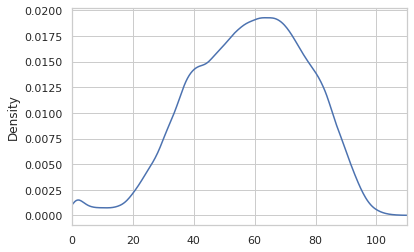

In [16]:
fig, ax = plt.subplots(nrows=1, ncols=1)
df.NU_IDADE_N.plot.kde(ax=ax)
ax.set_xlim(0,110)

In [17]:
df.groupby('EVOLUCAO').NU_IDADE_N.describe()

,count,mean,std,min,25%,50%,75%,max
EVOLUCAO,,,,,,,,
1.0,46080.0,51.764974,17.698589,0.0,39.0,51.0,64.0,136.0
2.0,41705.0,67.766839,16.087663,0.0,58.0,69.0,80.0,114.0
9.0,4843.0,53.885608,18.308977,0.0,41.0,54.0,67.0,103.0


'ax=ax'

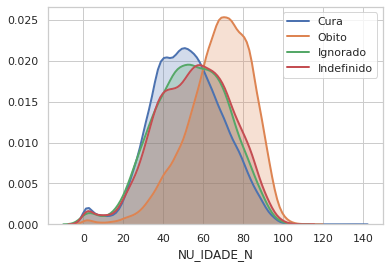

In [24]:
sns.distplot(df[df.EVOLUCAO == 1].NU_IDADE_N, hist = False, kde = True, kde_kws = {'shade': True, 'linewidth': 2}, label = 'Cura')
sns.distplot(df[df.EVOLUCAO == 2].NU_IDADE_N, hist = False, kde = True, kde_kws = {'shade': True, 'linewidth': 2}, label = 'Obito')
sns.distplot(df[df.EVOLUCAO == 9].NU_IDADE_N, hist = False, kde = True, kde_kws = {'shade': True, 'linewidth': 2}, label = 'Ignorado')
sns.distplot(df[~df.EVOLUCAO.isin([1, 2, 9])].NU_IDADE_N, hist = False, kde = True, kde_kws = {'shade': True, 'linewidth': 2}, label = 'Indefinido')
, ax=ax

In [22]:
df.loc[:, 'IDADE_BINS'] = df.NU_IDADE_N.map(lambda age: 10 * (age // 10))
df.loc[:, 'EVOLUCAO_BINS'] = df.EVOLUCAO.map(lambda x: 9 if x not in (1, 2, 9) else x).map({1:'Cura', 2:'Obito', 9:'Indefinido'})

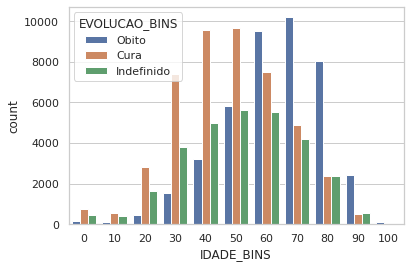

In [20]:
sns.countplot('IDADE_BINS',hue='EVOLUCAO_BINS',data=df[df.IDADE_BINS <= 100])
